<a href="https://colab.research.google.com/github/mohith-ds8/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_bike_sharing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction





##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Individual name -** Mohith DS
##### **Cohort -** Enlighten

# **Project Summary -** 

## Seoul Bike sharing demand prediction:
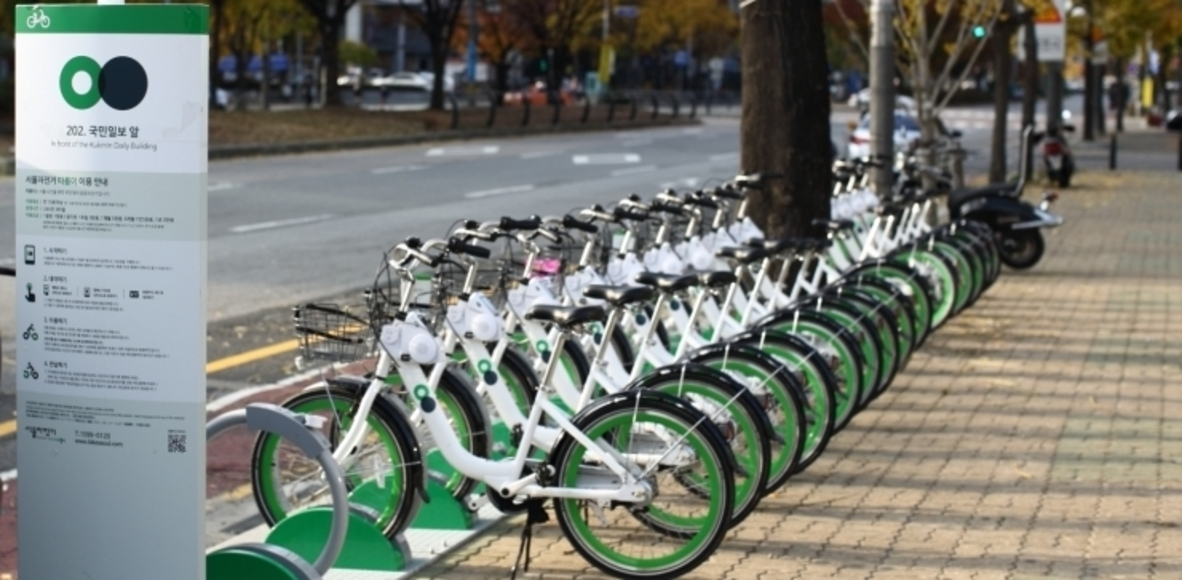
**Business problem:** Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

First we import the necessary libraries and look at our data and its characteristics. We have a dataset of 8760 rows and 14 columns with no duplicate/missing data. Next we study the features thoroughly and the data it represents.

In data wrangling, we first see that the column 'Date' is in 'object' datatype, and we convert it to datetime datatype. Later from the date column, we extract, 'day_of_week', 'month' & 'year' (year as a categorical value)
We drop the date column and we rename columns for convinence.
We convert 'hour' column to 'object' datatype as it should be considered as a categorical value.

Later we visualize our data and perform univariate analysis, bivariate analysis with respect to the dependant variable. The insights found from each chart is described. The linear relationship between the numerical features and dependant variable is also plotted. Finally, we visualize the correlation heatmap and pairplot for better understanding.

Based on our visualizations, we formulate 3 hypothetical statements and perform hypothesis tests. The statements are:

1.   The average bike count in Seoul city at any point of time is greater than 100.
2.   The average temperature in Seoul city at any point is grater than 10 degree Celsius.
3.   The Standard deviation of humdidity in Seoul city is 20.




Now was the time for feature engineering. We handled the outliers in 'Wind speed' column by using the capping method. Based on the correlation heatmap, we had the columns 'dew point temperature' and 'Temperature' were highly correlated. So we dropped the 'dew point temperature' column. In the Days of week column, we obsereved from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, we can further change this column to weekdays and weekends. Furthur, we performed one hot encoding on our categorical features with dropping the first column being true.
We found out during visualization that our dependant variable, 'Rented_bike_count' was right skewed, hence to overcome this we applied a squareroot transformation to get a normal distribution. Next we scaled our data using MinMax scaler. Finally we split our data into train and test in 80-20 ratio.

The data was ready to fit into  a machine learning model. First, we used Linear Regression. We got adjusted r2 score as 76.65%. There was no hyperparameter to be tuned. Second, we used Ridge(L2) Regression. We got adjusted r2 score as 76.65%. We used GridSearchCV for hyperparameter tuning in which we saw a slight improvement. Third, We used Lasso(L1) Regression with GridSearchCV for hyperparameter tuning. We got adjusted r2 score as 76.65%. Our fouth algorithm was Random Forest Regressor. With GridSearchCV for setting our hyperparameters, we got adjusted r2 score as 91%.

So finally, the bike rental company can deploy a machine learning model that uses Random Forest Regressor to predict the demand for city bikes for a particular hour, which can help the company meet the demand accurately. On the contrary when the company predicts to be a low demand day/season, the bikes can be sent to maintainance.

# **GitHub Link -**

https://github.com/mohith-ds8/Seoul-Bike-Sharing-Demand-Prediction

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW** 
####Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. **The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes**.

# **General Guidelines** : -  




1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [59]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Libraries for model implementation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

# Libraries for model metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

### Dataset Loading

In [60]:
# Loading the dataset
df = pd.read_csv('/content/SeoulBikeData.csv',encoding= 'unicode_escape')

### Dataset First View

In [61]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [62]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [63]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [64]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [65]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

The above dataset provides us the data on number of bikes that were rented in Seoul city by the hour of the day. The corresponding weather data for the hour is also given.

The dataset contains 8760 entries with 14 features. 4 out of 14 columns have 'object' data type, the rest are numeric.

There are no missing values/duplicate values in the dataset.


## ***2. Understanding Your Variables***

In [66]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [67]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 



*   **Date**: Date of the day.
*   **Rented Bike Count**: The number of bikes the were rented.
*   **Hour**: Hour of the day.
*   **Temperature(°C)**: Temperature of the hour in degree Celsius.
*   **Humidity(%)**: Humidity of the hour in %.
*   **Wind speed (m/s)**: Wind speed during the hour in metre/second.
*   **Visibility (10m)**: Visibility of 10 metres.
*   **Dew point temperature(°C)**: Dew point temperature in that hour in °C.
*   **Solar Radiation (MJ/m2)**: Solar radidation in MegaJoules / metre2.
*   **Rainfall(mm)**: Rainfall in mellimeter.
*   **Snowfall (cm)**: Snowfall in centimeter.
*   **Seasons**: The current season.
*   **Holiday**: Whether the given day is a holiday.
*   **Functioning Day**: Whether the given day is a Functioning Day.
						



### Check Unique Values for each variable.

In [68]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Copying the dataset for backup
df_copy = df.copy()

# converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])

# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name() # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object") # extract year from Date column and convert it in object type 

# drop the Date column
df.drop(columns=['Date'],inplace=True)

# Renaming columns for convinence 
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [70]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day_of_week,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017


In [71]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [72]:
numeric_features.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [73]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning_Day,day_of_week,month,year
0,0,Winter,No Holiday,Yes,Thursday,January,2017
1,1,Winter,No Holiday,Yes,Thursday,January,2017
2,2,Winter,No Holiday,Yes,Thursday,January,2017
3,3,Winter,No Holiday,Yes,Thursday,January,2017
4,4,Winter,No Holiday,Yes,Thursday,January,2017


### What all manipulations have you done and insights you found?



*   First we create a backup dataset under the name 'df_copy'.
*   The column 'Date' is in 'object' datatype, we need to convert it to datetime datatype.
*   From the date column, we extract, 'day_of_week', 'month' & 'year' (year as a categorical value)
*   We drop the date column
*   We rename columns for convinence
*   We convert 'hour' column to 'object' datatype.It should be considered as a categorical value.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Univariate analysis (Numerical features)

In [74]:
sns.set(rc={'figure.figsize':(10,6)})

In [75]:
sns.set_style(style='white')

#### Chart - 1 Rented_Bike_Count (histplot)

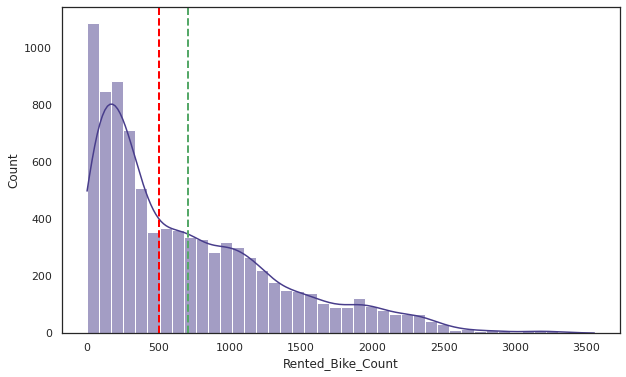

In [76]:
# Chart - 1 visualization code

sns.histplot(df['Rented_Bike_Count'],kde=True,color='darkslateblue')
plt.axvline(df['Rented_Bike_Count'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Rented_Bike_Count'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

The data is right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As more number of bikes are less than 500, the mass reorganization of the bikes will be easier for the company, thus giving a positive business impact.

#### Chart - 2 Temperature (histplot)

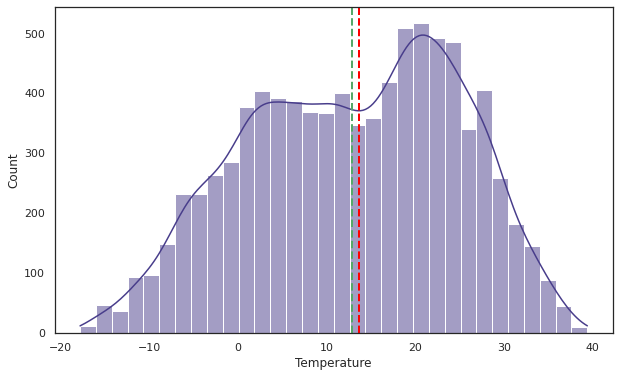

In [77]:
# Chart - 2 visualization code

sns.histplot(df['Temperature'],kde=True,color='darkslateblue')
plt.axvline(df['Temperature'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Temperature'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

The mean & median values are very close. The data is slightly left skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The mean & median temperature lies around 12-15 degrees, thus making it a pleasant temperature for the people to choose bikes, thus leading a positive business impact.

#### Chart - 3 Humidity (histplot)

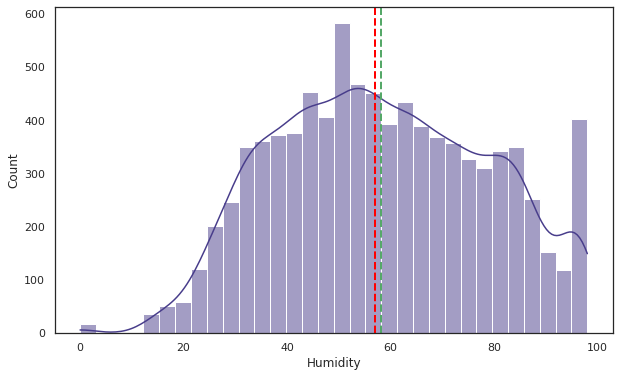

In [78]:
# Chart - 3 visualization code

sns.histplot(df['Humidity'],kde=True,color='darkslateblue')
plt.axvline(df['Humidity'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Humidity'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

We can see a close normal distribution curve. The mean & median lies close to 56%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When we have humdidty close to 55-60%, people are more likely to choose bikesover cars as the need of water consumption for an individual is reduced.

#### Chart - 4 Wind speed (histplot)

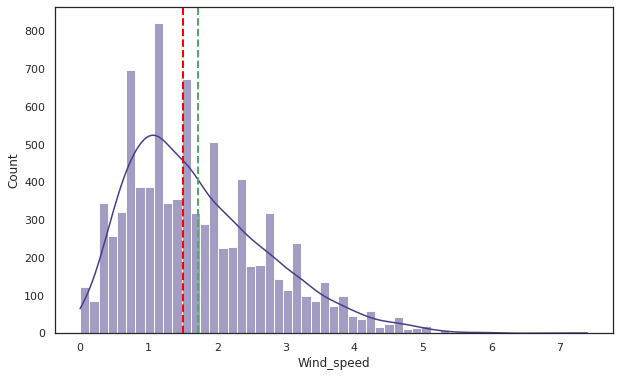

In [79]:
# Chart - 4 visualization code

sns.histplot(df['Wind_speed'],kde=True,color='darkslateblue')
plt.axvline(df['Wind_speed'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Wind_speed'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

The wind speed data is right skewed with an average speed of 1.8 m/s.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Wind speed generally would have no impact of ridership, but when wind speeds go higher than average, the ridership may tank.

#### Chart - 5 Visibility (histplot)

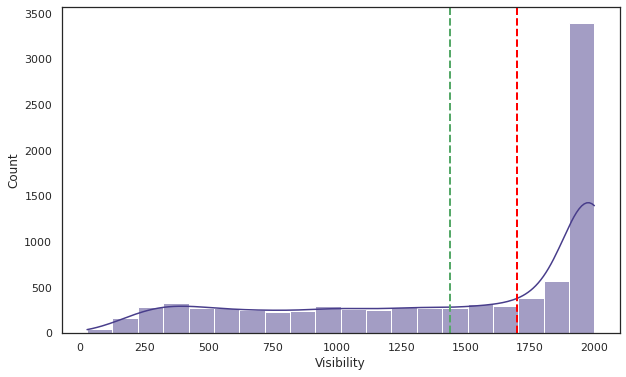

In [80]:
# Chart - 5 visualization code

sns.histplot(df['Visibility'],kde=True,color='darkslateblue')
plt.axvline(df['Visibility'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Visibility'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

Visibility has a highly left skewed data indicating the visibility as clear for most days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Generally, good visibility a basic must-have.

#### Chart - 6 Dew point temperature (histplot)

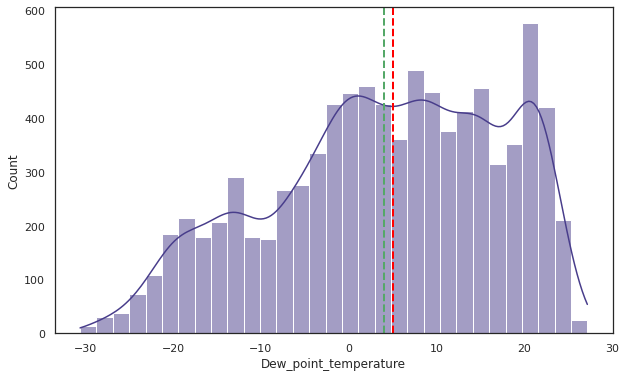

In [81]:
# Chart - 6 visualization code

sns.histplot(df['Dew_point_temperature'],kde=True,color='darkslateblue')
plt.axvline(df['Dew_point_temperature'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Dew_point_temperature'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

The dew point temperature is slightly left skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No

#### Chart - 7 Solar radiation (histplot)

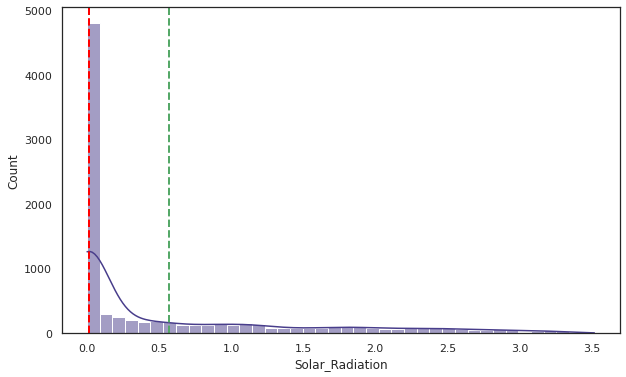

In [82]:
# Chart - 7 visualization code

sns.histplot(df['Solar_Radiation'],kde=True,color='darkslateblue')
plt.axvline(df['Solar_Radiation'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Solar_Radiation'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

It is highly right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No

#### Chart - 8 Snowfall (histplot)

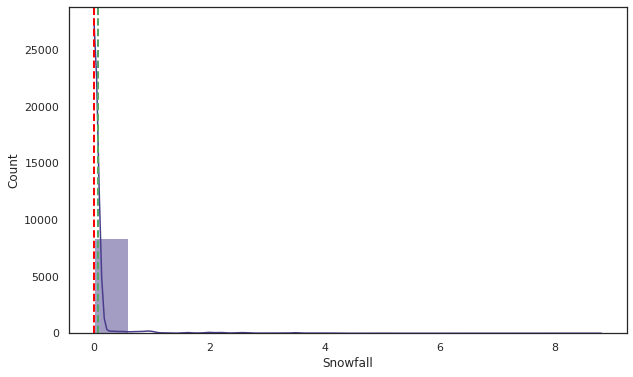

In [83]:
# Chart - 8 visualization code

sns.histplot(df['Snowfall'],kde=True,color='darkslateblue')
plt.axvline(df['Snowfall'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Snowfall'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

As the mean & median is close to 0, most days there's no snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The snowfall days might negatively impact the business.

###Univariate analysis (Categorical features)



#### Chart - 9 Seasons (piechart)

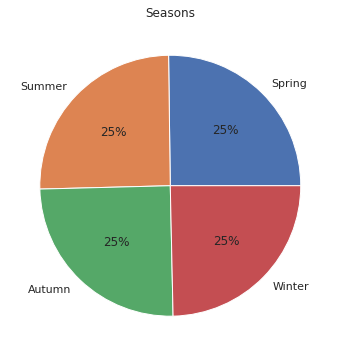

In [84]:
# Chart - 9 visualization code

plt.pie(df['Seasons'].value_counts(),labels = df['Seasons'].value_counts().keys().tolist(),autopct='%.0f%%')
plt.title('Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are one of the best ways for univariate analysis of categorical data.

##### 2. What is/are the insight(s) found from the chart?

There's even distribution suggesting that we have year round data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No

#### Chart - 10 Holiday (piechart)

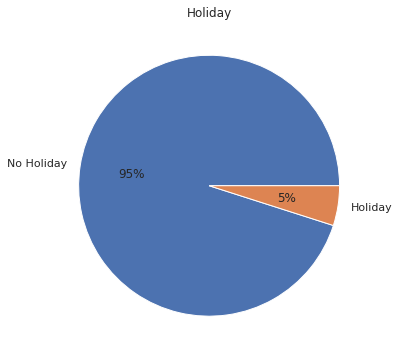

In [85]:
# Chart - 10 visualization code

plt.pie(df['Holiday'].value_counts(),labels = df['Holiday'].value_counts().keys().tolist(),autopct='%.0f%%')
plt.title('Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are one of the best ways for univariate analysis of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Most of the data we have is on a 'no holiday' day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Many people ride thier bikes to work/school, thus this feature may have positive impact on the business.

#### Chart - 11 Functioning day (piechart)

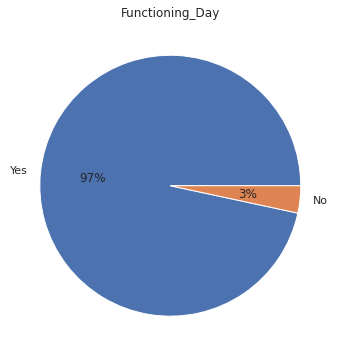

In [86]:
# Chart - 11 visualization code

plt.pie(df['Functioning_Day'].value_counts(),labels = df['Functioning_Day'].value_counts().keys().tolist(),autopct='%.0f%%')
plt.title('Functioning_Day')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are one of the best ways for univariate analysis of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Most of the data we have is on a 'functioning' day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we have more data on a functioning day, it lets us dig deep into the insights we can get from the hour of the day.

### Bivariate analysis

#### Chart - 12 Rented_bike_count vs seasons

<Axes: xlabel='Seasons', ylabel='Rented_Bike_Count'>

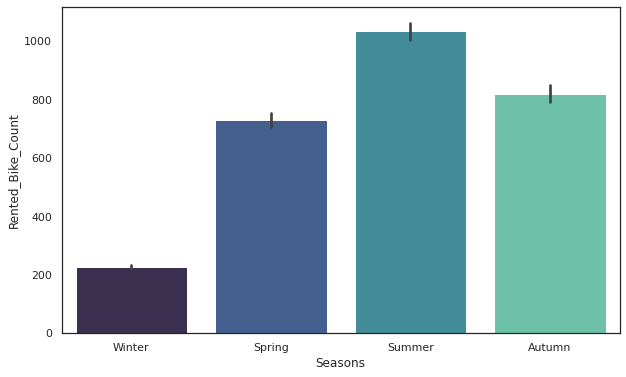

In [87]:
# Chart - 13 visualization code

sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',palette='mako')

##### 1. Why did you pick the specific chart?

A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

The bike ridership is significantly less in winter compared to the other 3 seasons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company needs more bike circulated in summer, autumn & spring & while in winter, they can schedule maintainance.

#### Chart - 13 rented_bike_count vs month

<Axes: xlabel='month', ylabel='Rented_Bike_Count'>

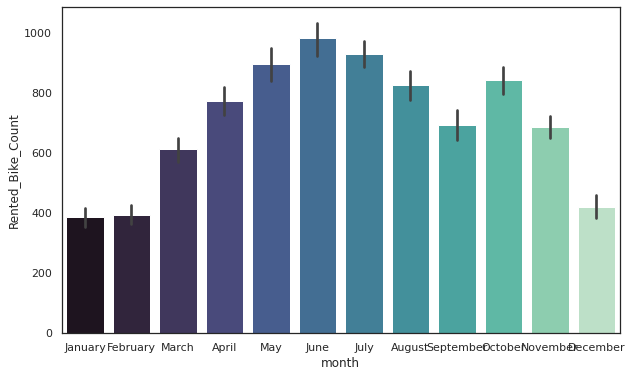

In [88]:
# Chart - 13 visualization code

sns.barplot(data=df,x='month',y='Rented_Bike_Count',palette='mako')

##### 1. Why did you pick the specific chart?

A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

The insights closely relate with weather seasons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company needs more bike circulated in summer, autumn & spring & while in winter, they can schedule maintainance.

#### Chart - 14 rented_bike_count vs hour

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

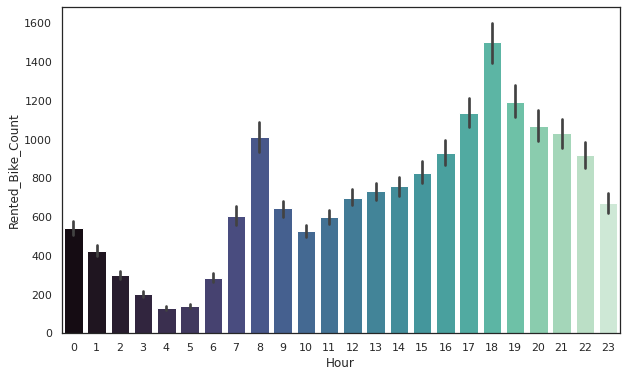

In [89]:
# Chart - 13 visualization code

sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',palette='mako')

##### 1. Why did you pick the specific chart?

A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

The ridership sees demand in the rush hours & does'nt suddenly drop but see steady demand till 12:00 am.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The bike movers can be prepared in advance to meet the requirements for the rush hour.

#### Chart - 15 rented_bike_count vs day_of_week

<Axes: xlabel='day_of_week', ylabel='Rented_Bike_Count'>

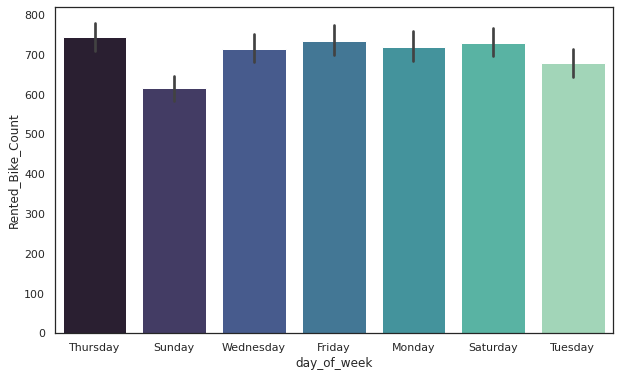

In [90]:
# Chart - 13 visualization code

sns.barplot(data=df,x='day_of_week',y='Rented_Bike_Count',palette='mako')

##### 1. Why did you pick the specific chart?

A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

There's slight less demand for the bikes on sunday & tuesday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No

#### Chart - 16 rented_bike_count vs holiday

<Axes: xlabel='Holiday', ylabel='Rented_Bike_Count'>

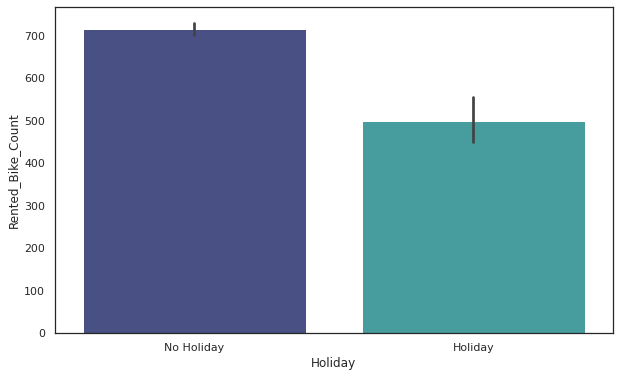

In [91]:
# Chart - 13 visualization code

sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',palette='mako')

##### 1. Why did you pick the specific chart?

A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

There's reduced demand for the bikes on a holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This suggests the many people who go to work/school use this bikes in majority.

#### Chart - 17 rented_bike_count vs temperature

<Axes: xlabel='Temperature', ylabel='Rented_Bike_Count'>

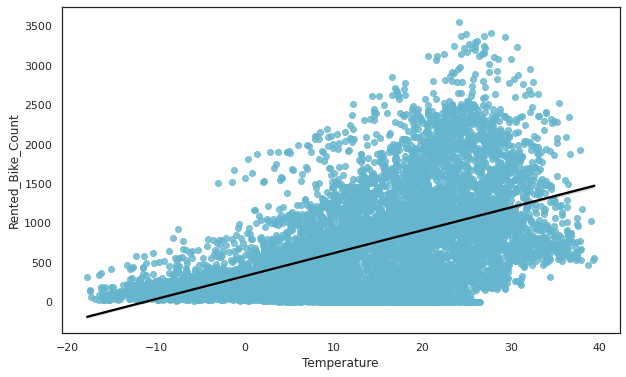

In [92]:
# Chart - 13 visualization code

sns.regplot(x=df['Temperature'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

##### 2. What is/are the insight(s) found from the chart?

Temperature is positively related with Rented_Bike_Count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the temperature, better ridership.





#### Chart - 18 rented_bike_count vs humidity

<Axes: xlabel='Humidity', ylabel='Rented_Bike_Count'>

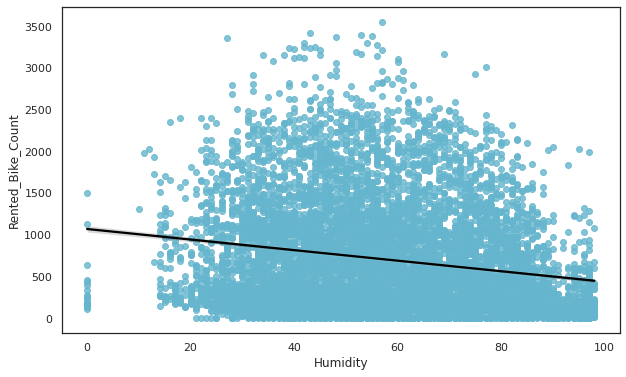

In [93]:
# Chart - 13 visualization code

sns.regplot(x=df['Humidity'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

##### 2. What is/are the insight(s) found from the chart?

Humidity is negatively related with Rented_Bike_Count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the humidity, lesser the ridership.

#### Chart - 19 rented_bike_count vs wind speed

<Axes: xlabel='Wind_speed', ylabel='Rented_Bike_Count'>

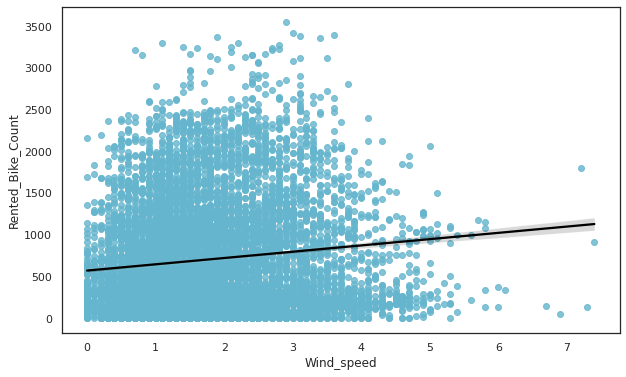

In [94]:
# Chart - 13 visualization code

sns.regplot(x=df['Wind_speed'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

##### 2. What is/are the insight(s) found from the chart?

wind speed is positively related with Rented_Bike_Count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the wind speed, better ridership.

#### Chart - 20 rented_bike_count vs visibility

<Axes: xlabel='Visibility', ylabel='Rented_Bike_Count'>

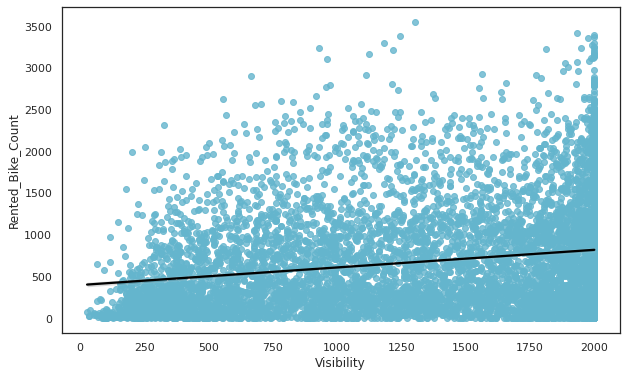

In [95]:
# Chart - 13 visualization code

sns.regplot(x=df['Visibility'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

##### 2. What is/are the insight(s) found from the chart?

visibility is positively related with Rented_Bike_Count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the visibility, better ridership.

#### Chart - 21 Rented_Bike_Count vs solar radiation

<Axes: xlabel='Solar_Radiation', ylabel='Rented_Bike_Count'>

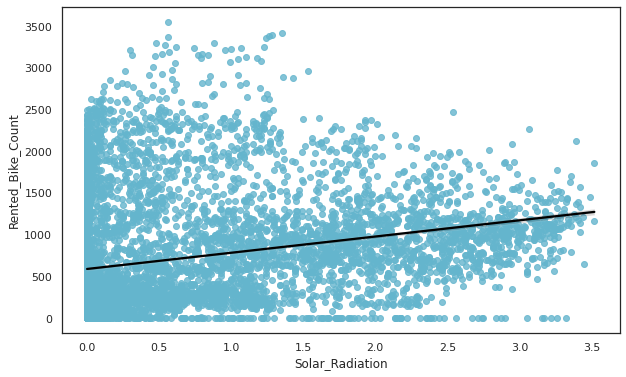

In [96]:
# Chart - 13 visualization code

sns.regplot(x=df['Solar_Radiation'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

##### 2. What is/are the insight(s) found from the chart?

Solar radiation is positively related with Rented_Bike_Count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the solar radiation, better ridership.

#### Chart - 22 Rented_Bike_Count vs dew point temperature

<Axes: xlabel='Dew_point_temperature', ylabel='Rented_Bike_Count'>

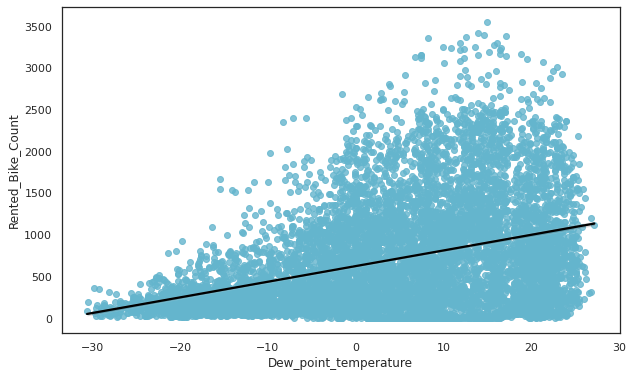

In [97]:
# Chart - 13 visualization code

sns.regplot(x=df['Dew_point_temperature'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

##### 2. What is/are the insight(s) found from the chart?

dew point temperature is positively related with Rented_Bike_Count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the dew point temperature, better ridership.

#### Chart - 23 Rented_Bike_Count vs rainfall

<Axes: xlabel='Rainfall', ylabel='Rented_Bike_Count'>

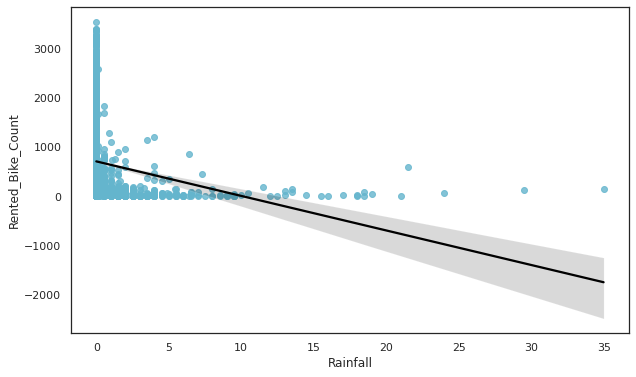

In [98]:
# Chart - 13 visualization code

sns.regplot(x=df['Rainfall'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

##### 2. What is/are the insight(s) found from the chart?

Rainfall is negatively related with Rented_Bike_Count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the rainfall, ;esser the ridership.

#### Chart - 24 Rented_Bike_Count vs snowfall

<Axes: xlabel='Snowfall', ylabel='Rented_Bike_Count'>

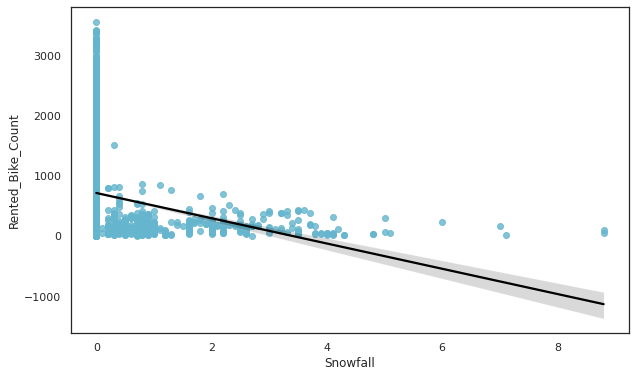

In [99]:
# Chart - 13 visualization code

sns.regplot(x=df['Snowfall'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

##### 2. What is/are the insight(s) found from the chart?

Snowfall is negatively related with Rented_Bike_Count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the snowfal, lesser the ridership.

#### Chart - 25 - Correlation Heatmap

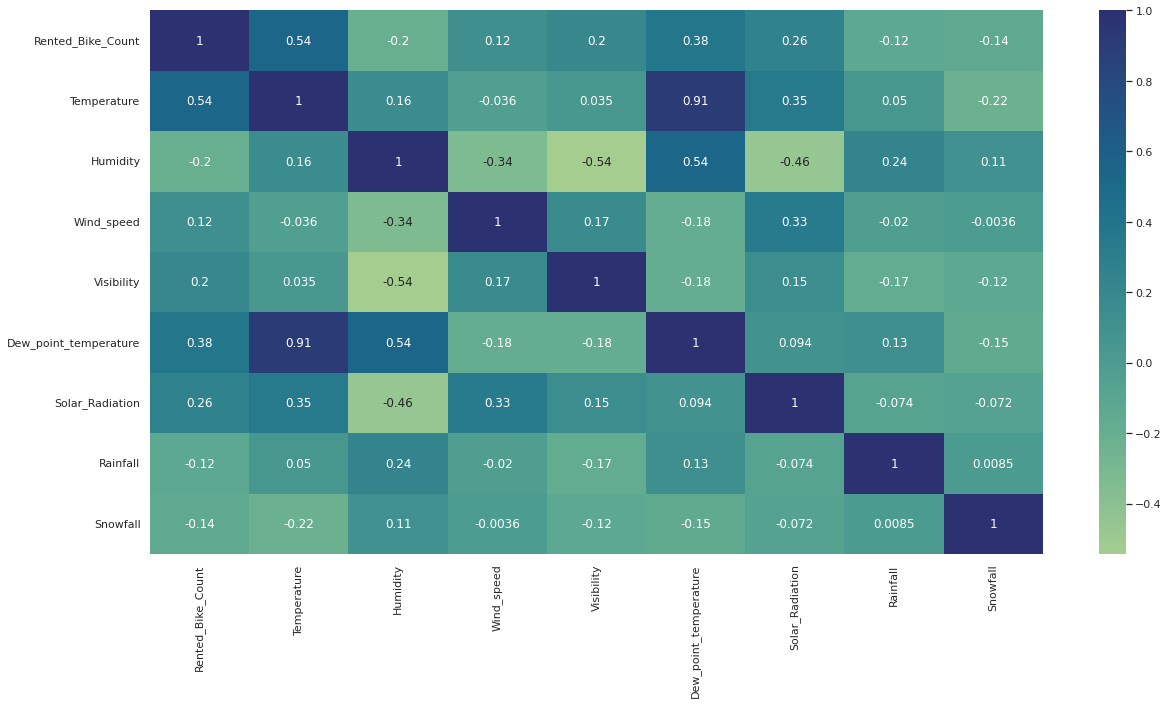

In [100]:
# Chart - 13 visualization code

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

##### 1. Why did you pick the specific chart?

Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

##### 2. What is/are the insight(s) found from the chart?



*   Humidity has low correlation with visibility due to solar radiation.
*   Dew point temperature and temperature are highly related.




#### Chart - 26 - Pair Plot 

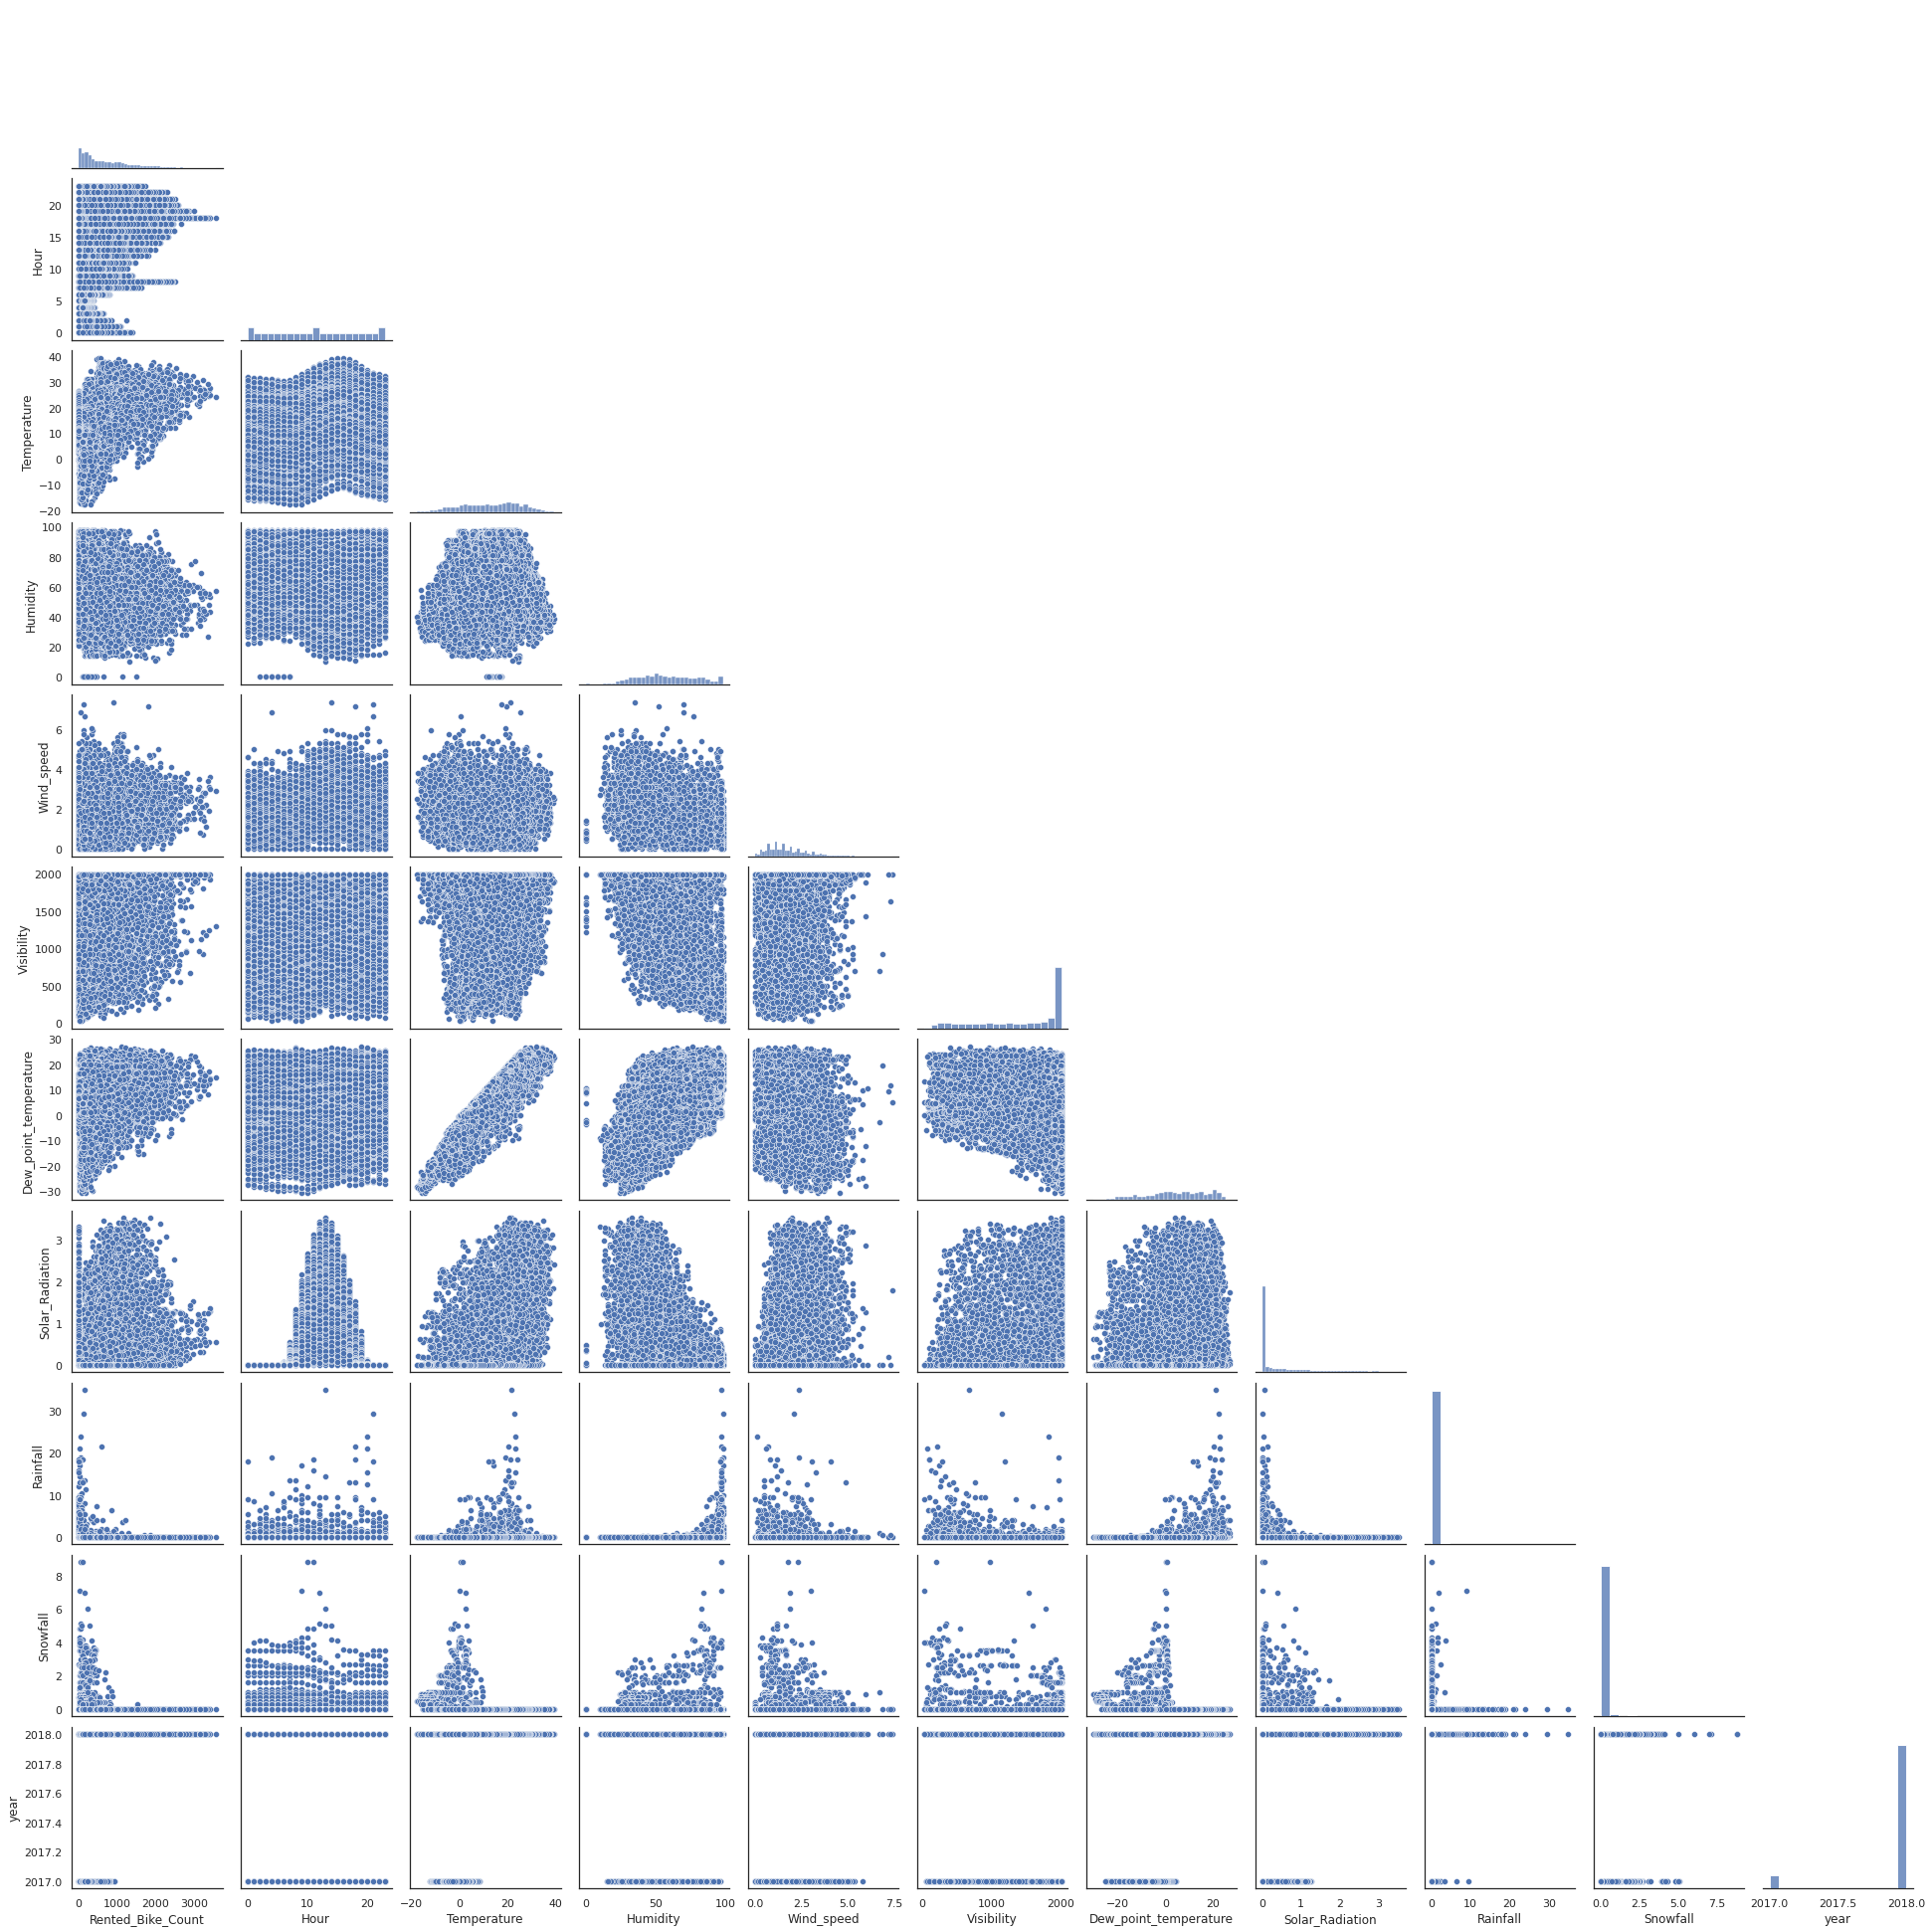

In [101]:
# Pair Plot visualization code

sns.pairplot(df, corner=True)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



1.   The average bike count in Seoul city at any point of time is greater than 100.
2.   The average temperature in Seoul city at any point is greater than 10 degree Celsius.
3.   The Standard deviation of humdidity in Seoul city is 20.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research hypothesis: The average bike count in Seoul city at any point of time is greater than 100.


*   Null hypothesis H0: Average = 100.
*   Alternate hypothesis Ha: Average > 100. 




#### 2. Perform an appropriate statistical test.

In [102]:
# Perform Statistical Test to obtain P-Value

rented_bike_count_sample = df['Rented_Bike_Count'].sample(500)
rented_bike_count_mean = np.mean(rented_bike_count_sample)
rented_bike_count_std = np.std(rented_bike_count_sample)

In [103]:
# Computing test statistic

ts = (rented_bike_count_mean-100)/(rented_bike_count_std/(np.sqrt(500)))
ts

21.296566428190246

In [104]:
# Calculating the probability
prob_z = norm.cdf(9.3441, 0, 1)
print(prob_z)

1.0


In [105]:
# P-Value
p1 = 1-prob_z
p1

0.0

##### Which statistical test have you done to obtain P-Value?

We have chosen **Z-test** to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value.
The probability we have obtained is close to 100%, so we have sufficient evidence to reject  H0. Therefore, the average bike count in Seoul city at any point of time is greater than 100.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average temperature in Seoul city at any point is grater than 10 degree Celsius.
*   Null hypothesis H0: Average = 10.
*   Alternate hypothesis Ha: Average > 100. 

#### 2. Perform an appropriate statistical test.

In [106]:
# Perform Statistical Test to obtain P-Value

temp_sample = df['Temperature'].sample(500)
temp_mean = np.mean(temp_sample)
temp_std = np.std(temp_sample)

In [107]:
temp_std

12.109434885245472

In [108]:
# Computing test statistic

ts2 = (temp_mean-10)/(temp_std/(np.sqrt(500)))
ts2

4.436521583089619

In [109]:
# Calculating the probability
prob_z = norm.cdf(4.90, 0, 1)
print(prob_z)

0.9999995208167234


In [110]:
# P-Value
p1 = 1-prob_z
p1

4.791832766137816e-07

##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is 99%, so we have sufficient evidence to reject H0. Therefore, the average temperature in Seoul city at any point of time is greater than 10 degrees.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Standard deviation of humdidity in Seoul city is 20.
*   Null hypothesis H0: Standard deviaiton != 20.
*   Alternate hypothesis Ha: Standard deviaiton = 20. 

#### 2. Perform an appropriate statistical test.

In [111]:
# Perform Statistical Test to obtain P-Value

humid_sample = df['Humidity'].sample(50)
S2 = (np.std(humid_sample))**2

In [112]:
# Computing test statistic

ts3 = (49 * S2)/(20*20)
ts3

33.012525000000004

In [113]:
# Calculating the probability
prob = chi2.cdf(53.55,49)
print(prob)

0.6960317386207685


##### Which statistical test have you done to obtain P-Value?

We have chosen Chi2-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for standard deviation, we have chosen Chi2-test to obtain p-value. The probability we have obtained is 69%, so we have sufficient evidence to reject H0. Therefore, the standard deviation of humidity is 20.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### There are no missing values.

### 2. Handling Outliers

<Axes: >

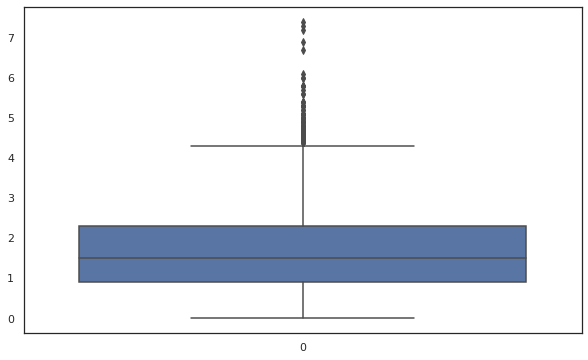

In [114]:
# Handling Outliers & Outlier treatments

sns.boxplot(df['Wind_speed'])

In [115]:
# Finding the IQR
percentile25 = df['Wind_speed'].quantile(0.25)
percentile75 = df['Wind_speed'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [116]:
# Capping
df['Wind_speed'] = np.where(
    df['Wind_speed'] > upper_limit,
    upper_limit,
    np.where(
        df['Wind_speed'] < lower_limit,
        lower_limit,
        df['Wind_speed']
    )
)

<Axes: >

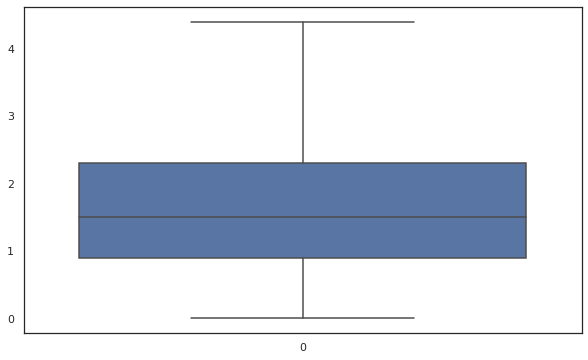

In [117]:
# Checking for outliers
sns.boxplot(df['Wind_speed'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used **'Capping'** method to treat outliers. As there are only 8760 entries in my dataset, trimming the outliers would lead to data loss.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

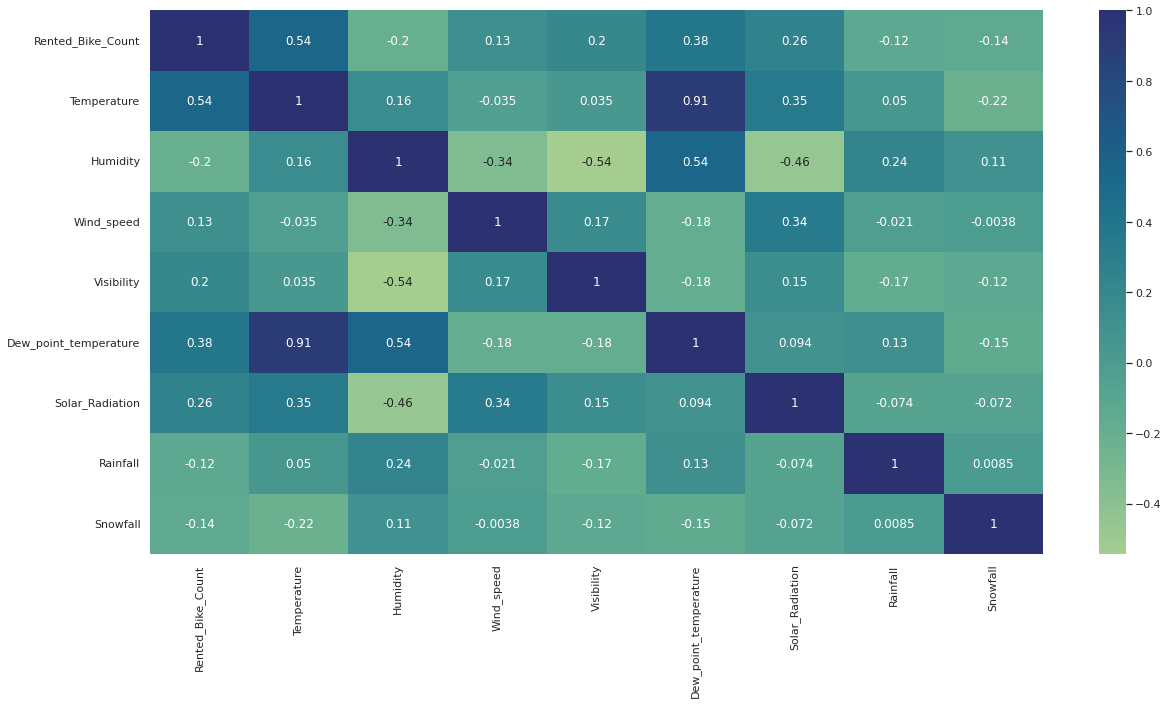

In [118]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

As we can see there is multicollinearity between the columns 'Temperature' & 'Dew_point_temperature'. Hence we can drop the column 'Dew_point_temperature'.

In [119]:
df.drop('Dew_point_temperature',axis=1,inplace=True)

Creating a new column 'week'

In [120]:
# We'll create a new categorical feature called 'weekend'

# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, we can further change this column to weekdays and weekends.

In [121]:
df.drop('day_of_week',axis=1,inplace=True)

### 4. Categorical Encoding

In [122]:
# Encode your categorical columns

# Using Pandas get Dummies for Encoding categorical features 
df=pd.get_dummies(df,drop_first=True,sparse=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [123]:
df.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'year_2018',
       'week_Weekend'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used One hot encoding, and also dropping the first column of each encoded column. This method is an effective technique used to represent categorical variables as numerical values for a machine learning model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

<Axes: xlabel='Rented_Bike_Count', ylabel='Count'>

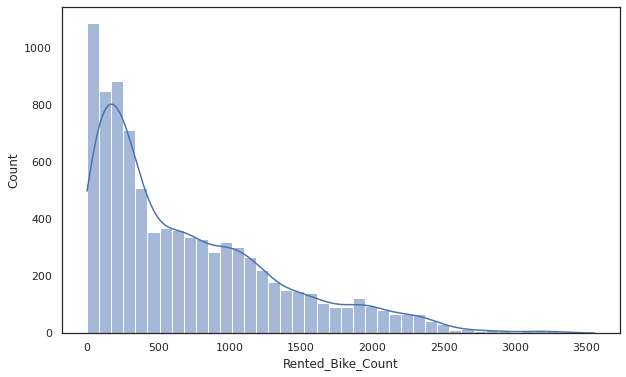

In [124]:
# Transform Your data
sns.histplot(df['Rented_Bike_Count'],kde=True)

In [125]:
df['Rented_Bike_Count']=np.sqrt(df['Rented_Bike_Count'])

In [126]:
df['Rented_Bike_Count'].head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

<Axes: xlabel='Rented_Bike_Count', ylabel='Count'>

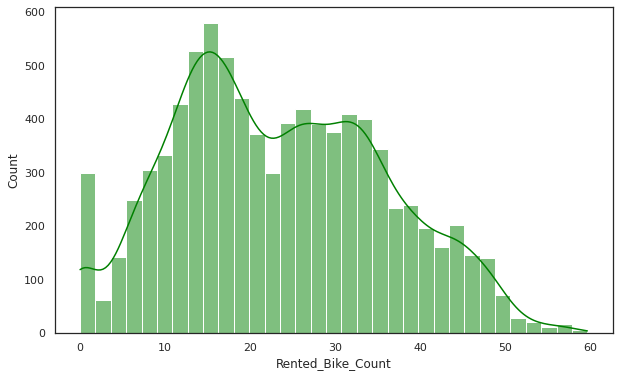

In [127]:
sns.histplot(df['Rented_Bike_Count'],kde=True,color='green')

Yes, the rented_bike_count column was right skewed. I have to square root transformation as it provides the best normal distribution compared to the log/square tranformations.

### 6. Data Splitting

In [130]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = df.drop(columns=['Rented_Bike_Count'],axis=1)
y = df['Rented_Bike_Count']

In [131]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [132]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7008, 48), (1752, 48), (7008,), (1752,))

##### What data splitting ratio have you used and why? 

I have used 80-20 split ratio. This optimal ratio provides enough data for the model to train upon & also to upon.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [129]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Scaling

In [ ]:
# Scaling your data

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I have used min max scaler. As the dataset had values ranging from -30 & 3000, a scaling method had to be used for optimal model performance.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [ ]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr.fit(X_train,y_train)

# Predict on the model
y_pred = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [134]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error(y_test, y_pred)
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error(y_test, y_pred)
print('MAE :', MAE)

# R2
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 34.81619555227504
RMSE : 5.900525023442833
MAE : 4.50166861995496
R2 : 0.7754273253601277
Adjusted R2 : 0.7690976199093268


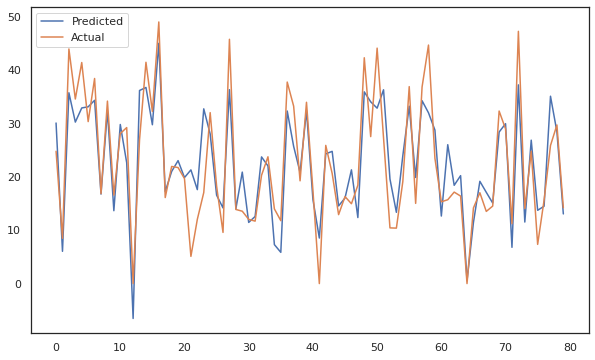

In [135]:
# Visualizing evaluation Metric Score chart

plt.plot((y_pred)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [136]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Ridge Regression

In [ ]:
# ML Model - 2 Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the model
y_pred_ridge = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [138]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 34.81613384963401
RMSE : 5.900519794868416
MAE : 4.501957385152606
R2 : 0.7754277233567184
Adjusted R2 : 0.7690980291236722


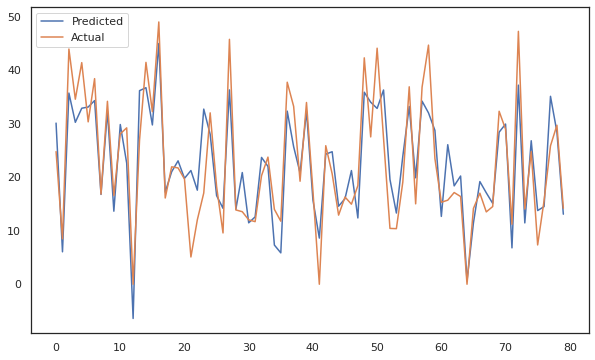

In [139]:
# Visualizing evaluation Metric Score chart

plt.plot((y_pred_ridge)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_gcv = GridSearchCV(ridge, parameters, scoring='r2', cv=5)

# Fit the Algorithm
ridge_gcv.fit(X_train, y_train)

# Predict on the model
y_pred_ridge_gcv = ridge_gcv.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant imporovement seen.

In [141]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_ridge_gcv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_ridge_gcv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_ridge_gcv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_ridge_gcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 34.81613384963401
RMSE : 5.900519794868416
MAE : 4.501957385152606
R2 : 0.7754277233567184
Adjusted R2 : 0.7690980291236722


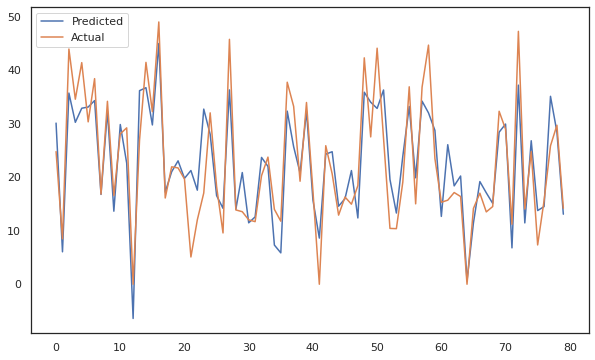

In [142]:
# Visualizing evaluation Metric Score chart

plt.plot((y_pred_ridge_gcv)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

### ML Model - 3 Lasso Regression

In [ ]:
# ML Model - 3 Implementation
lasso = Lasso()

# Fit the Algorithm
lasso.fit(X_train,y_train)

# Predict on the model
y_pred_lasso = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [144]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 92.83497005793201
RMSE : 9.635090557848017
MAE : 7.267185311997752
R2 : 0.4011925428578328
Adjusted R2 : 0.3843148223981592


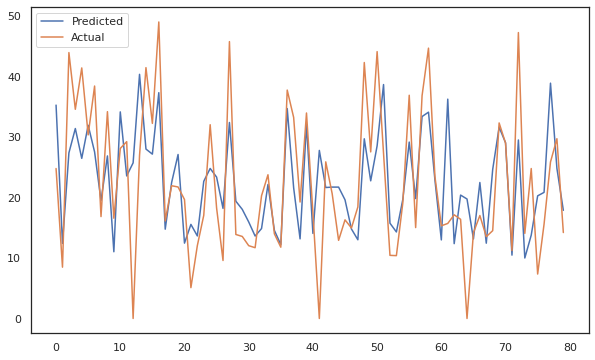

In [145]:
# Visualizing evaluation Metric Score chart
plt.plot((y_pred_lasso)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
lasso_gcv = GridSearchCV(lasso, parameters, scoring='r2', cv=5)

# Fit the Algorithm
lasso_gcv.fit(X_train, y_train)

# Predict on the model
y_pred_lasso_gcv = lasso_gcv.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen, the model performance decreased comapred to linear regression and Ridge regression.

In [147]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_lasso_gcv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_lasso_gcv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_lasso_gcv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_lasso_gcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 34.80579949365999
RMSE : 5.899644014146954
MAE : 4.500047025314915
R2 : 0.7754943823906809
Adjusted R2 : 0.7691665669794963


### ML Model - 4 Random Forest Regression

In [ ]:
# ML Model - 4 Implementation
rf_model = RandomForestRegressor()

# Fit the Algorithm
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred_rf = rf_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [149]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 12.443238410617047
RMSE : 3.5274974713835086
MAE : 2.400517586083326
R2 : 0.9197381768246857
Adjusted R2 : 0.9174759528009541


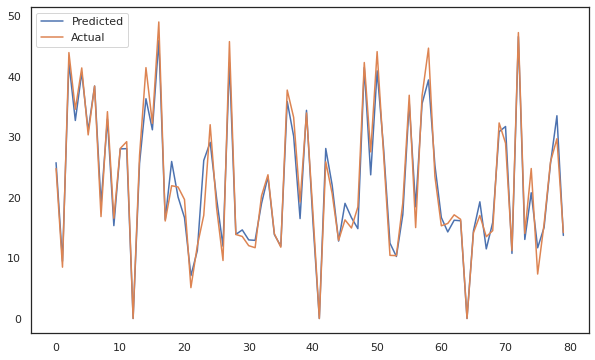

In [150]:
# Visualizing evaluation Metric Score chart
plt.plot((y_pred_rf)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_estimators':[5, 10, 15, 20, 30],
              'max_depth' : [3, 5, 10, 15, 20],
              'max_features':['auto','sqrt','log2']
              }
Random_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,cv=3)

# Fit the Algorithm
Random_forest_Grid_search.fit(X_train, y_train)

# Predict on the model
y_pred_rf_gcv = Random_forest_Grid_search.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Major improvements compared to linear models were seen, however the hyperparamter max depth performs better @ None i.e till all the leaf nodes are pure.

In [152]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_rf_gcv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_rf_gcv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_rf_gcv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_rf_gcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 13.67057977185898
RMSE : 3.69737471347698
MAE : 2.534264874288741
R2 : 0.9118215355082501
Adjusted R2 : 0.9093361765560457


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have chosen **Adjusted R2 score** as it is best able to explain the variance in the data. The adjusted R2 score also adjusts for predictors that are not significant in a regression model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen **Random Forest Regressor** as my final prediction model. With an adjusted r2 score of **91%**, we can consider random forest regressor as our best model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [153]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

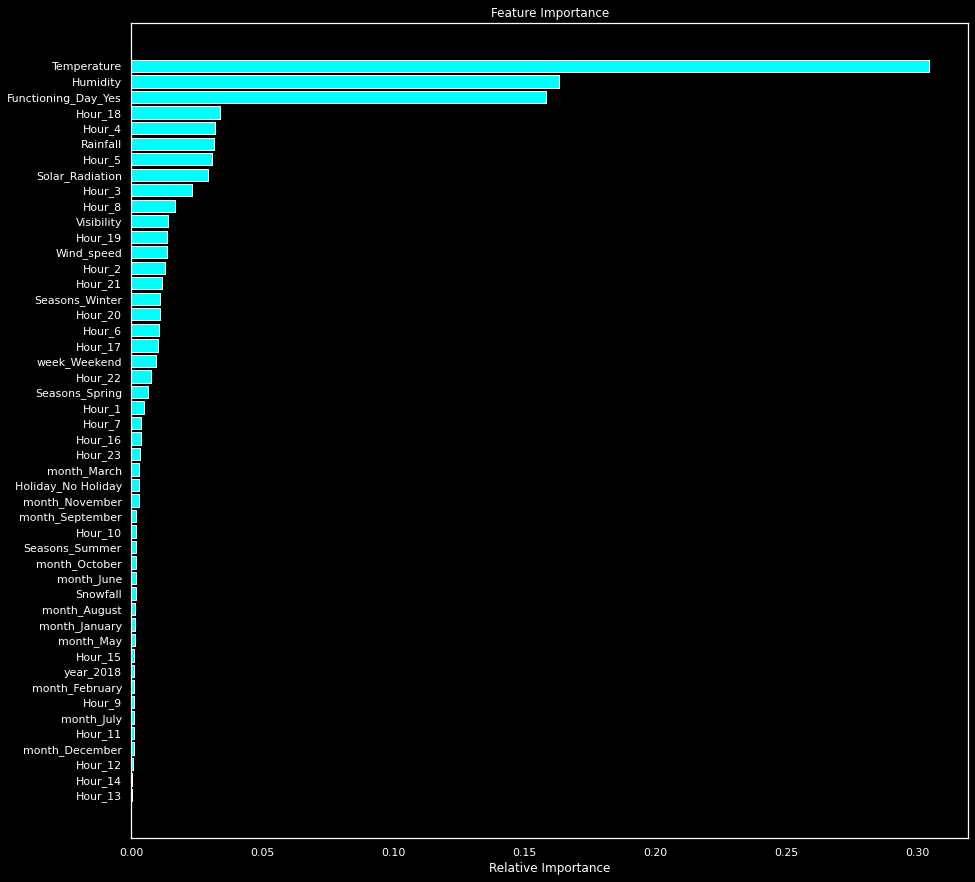

In [155]:
#Plotting figure
plt.figure(figsize=(15,15))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

As we can see from the feature importance graph, the feature 'temperature' can be considered as most important with relative importance of 0.30. The next 2 features are humidity and functioning day-yes can be considered with relative importance of 0.17. As these 3 main features play a role in decreasing the value of entropy, the machine learning model, random forest regressor considers them closer to the root node.

# **Conclusion**

In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We then later hot encoded the categorical variables.

Next we implemented 4 machine learning algorithms Linear Regression,Ridge(L2), Lasso(L1), Random Forest Regressor. We did some hyperparameter tuning to improve our model performance.






*   Out of all above models Random forest Regressor gives the highest R2 score of 91% for test Set.
*   No overfitting is seen.

**So the bike rental company can deploy a machine learning model that uses Random Forest Regressor to predict the demand for city bikes for a particular hour, which can help the company meet the demand accurately. On the contrary when the company predicts to be a low demand day/season, the bikes can be sent to maintainance.** 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***